# Frequency Translation

A bandpass signal is a narrow band signal centered at a frequency, $f_c$.  Bandpass signals occur often in communications systems, especially wireless communications.  This is because we have only a limited amount of baseband spectrum that we must all share.  The most common way of getting around this problem is to move the baseband signal up so it is centered on the carrier frequency, $f_c$.  Moving it up and down involves frequency shifting.  That is the topic of this notebook.  

Often we wish to move a bandpass  into the computer.  Getting an A/D converter with a sufficient sampling rate for that signal is expensive.  The solution is to move the frequency down to baseband.  How can we do frequency translation?  In the frequency domain, frequency translation is rather obvious.  Shifting a specturm, $X(f)$ up $f_c$ Hz would just be $X(f-f_c)$.  What is it in time?  $$ \mathscr {F^{-1}} [X(f-f_c)] = \int_{-\infty}^{\infty} X(f-f_c) e^{j2\pi ft} df$$  Let's make a substitition, $u = f-f_c$.  This gives us $$\mathscr {F^{-1}} [X(f-f_c)] = \int_{-\infty}^{\infty} X(u) e^{j2\pi (u+f_c) t} du = e^{j2\pi f_ct} \int_{-\infty}^{\infty} X(u) e^{j2\pi (u) t} du = e^{j2\pi f_ct} [\mathscr {F^{-1}} [X(f)]] = e^{j2\pi f_ct} x(t)$$  From this we see that frequency shifts can be achieved by multiplying by $e^{j2\pi f_ct}$.  This looks rather easy, but how do we multiply a real signal, $x(t)$ by a complex function of frequency and time?  How about if we multiply by $cos(2\pi f_c t + \theta) = 1/2[e^{j2\pi f_ct+\theta} + e^{-j2\pi f_ct+\theta}]$?  This makes two "half  copies" of $X(f)$ and moves one up $f_c$ and the other down $f_c$.



In the discrete domain, you can do this too, but the frequency shift must be a sample frequency.  $$X(n-m) = \sum_{k=0}^{N-1} x(k) e^{-j2\pi (n-m)k/N} = \sum_{k=0}^{N-1} [x(k)e^{j2\pi mk/N}]$$  The last sum is recognized as the $DFT[x(k)e^{j2\pi mk/N}]$.  This means that shifting a signal $m$ points up in frequency is done by multiplying by $e^{j2\pi mk/N}$.  A demo of this is seen below.

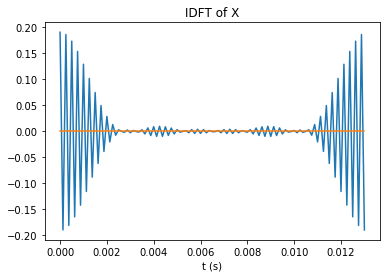

In [5]:
import numpy as np
import matplotlib.pyplot as plt

N = 105  # Needs to be odd, to make x(t) a real number
T = 1/8000

m = np.arange(-N/2, N/2)
n = np.arange(0, N)
f = 1/N/T*m
t = n*T
X = np.concatenate((np.zeros(np.int(N/2)-3),[1, 2, 3, 4, 4, 3, 2, 1], np.zeros(np.int(N/2)-4)),0)
x = np.fft.ifft(X)
plt.plot(t,np.real(x), t, np.imag(x))
plt.title('IDFT of X');
plt.xlabel('t (s)');

Notice that the signal $x(t)$ is large at the beginning and end of the period.  This can lead to unexpected results if somehow your signal has frequencies that are not exactly on the sample frequencies, as would happen when you shift to a frequency not equal to a sample point.  If you must have frequencies that are not sample frequencies, then it would give better results if you use fftshift to delay the signal so the signal is small at the beginning and end of the sampling interval.  In general it is best to have sample points at all the frequencies you have.  This happens naturally if you have a periodic signal.  There are comments in the code below showing how you can investigate this if you like.

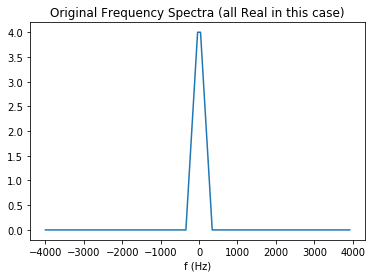

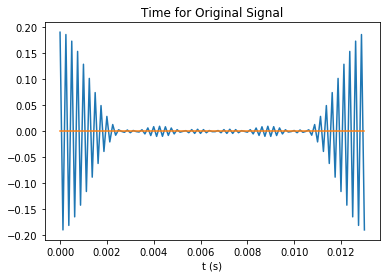

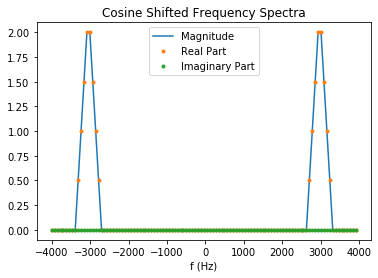

In [4]:
#x = np.fft.fftshift(x)
plt.plot(f, X)
plt.title('Original Frequency Spectra (all Real in this case)')
plt.xlabel('f (Hz)')
plt.show()
plt.plot(t, np.real(x),t,np.imag(x))
plt.title('Time for Original Signal')
plt.xlabel('t (s)')
plt.show()
f_c = np.int(N/2)/4/T/N  # Note: This must be one of the frequencies sampled for no distortion.
# It is interesting to change this to be a non sampled frequency and see what happens.  The 
# results are disturbing.  They can be made better by uncommenting x = np.fft.fftshift(x)
# at the beginning of this cell.
#xs = x*np.exp(np.complex(0,1)*2*np.pi*f_c*t)  # To test shifting only one way.
x = np.real(x)  # It is real, but now make it real we get no warning from the plot.
xs = x*np.cos(2*np.pi*f_c*t)
Xs = np.fft.fftshift(np.fft.fft(xs))
plt.plot(f, np.abs(Xs), f, np.real(Xs), '.', f, np.imag(Xs), '.')
plt.title('Cosine Shifted Frequency Spectra')
plt.xlabel('f (Hz)')
plt.legend(['Magnitude','Real Part','Imaginary Part']);

Note how using the fftshift is so important.  The two spectra that come from each frequency of $cos(2\pi f_c t)$. If you don't want distortion from  leakage, you need to make sure th frequency shift. $f_c$ is one of the sample frequencies.  

1.  It isn't easy to do a multiplication of $x(t)$ by $cos(2\pi f_c t)$ in analog electronics, so the most common way of shifting frequency is to multiply $x(t)$ by $sgn(cos(2\pi f_c t))$, a square wave with fundamental frequency $f_c$.  The $sgn(t)$ function is one for $t>0$, negative one for $t<0$, and zero for $t=0$. The circuit that does this is called a doubly balanced mixer, and is often implimented with voltage controlled switches.  What is the frequency spectra (up to $10 f_c$) of this mixed signal, $x(t) sgn(cos(2\pi f_c t))$?  We used this concept in the WWU Vector Network Analyzer.  You could easily make code to do this problem.